In [1]:
# Basic data load in and analysis for RAMSES data with yt
# Matt Sampson 2023

In [13]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import yt
import cmasher as cmr
import visu_ramses

In [14]:
# plot params
plt.rcParams["xtick.top"] = True 
plt.rcParams["ytick.right"] = True
plt.rcParams["xtick.direction"] = 'in' 
plt.rcParams["ytick.direction"] = 'in' 
plt.rcParams["xtick.minor.visible"] = True 
plt.rcParams["ytick.minor.visible"] = True 
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

In [15]:
# define path to data
PATH_prefix = "/scratch/gpfs/ms0821/monte_carlo_CR_2023/public_ramses/ramses/tests/"
PATH_suffix = "turb/driving/"
PATH = PATH_prefix + PATH_suffix

In [16]:
# define specific snapshots and load in data
filename = "output_00002/info_00002.txt"
ds = yt.load(PATH+filename)

yt : [INFO     ] 2023-08-30 14:29:20,031 Parameters: current_time              = 0.251364446311192
yt : [INFO     ] 2023-08-30 14:29:20,031 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2023-08-30 14:29:20,032 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-08-30 14:29:20,033 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-08-30 14:29:20,033 Parameters: cosmological_simulation   = 0


In [17]:
# get some basic info
ds.field_list

yt : [WARNING  ] 2023-08-30 14:29:22,720 This output has no cooling fields


[('ramses', 'Density'),
 ('ramses', 'Pressure'),
 ('ramses', 'x-velocity'),
 ('ramses', 'y-velocity'),
 ('ramses', 'z-velocity')]

yt : [INFO     ] 2023-08-30 14:29:27,544 Projection completed
yt : [INFO     ] 2023-08-30 14:29:27,545 xlim = 0.000000 1.000000
yt : [INFO     ] 2023-08-30 14:29:27,546 ylim = 0.000000 1.000000
yt : [INFO     ] 2023-08-30 14:29:27,546 xlim = 0.000000 1.000000
yt : [INFO     ] 2023-08-30 14:29:27,547 ylim = 0.000000 1.000000
yt : [INFO     ] 2023-08-30 14:29:27,548 Making a fixed resolution buffer of (('ramses', 'Density')) 800 by 800



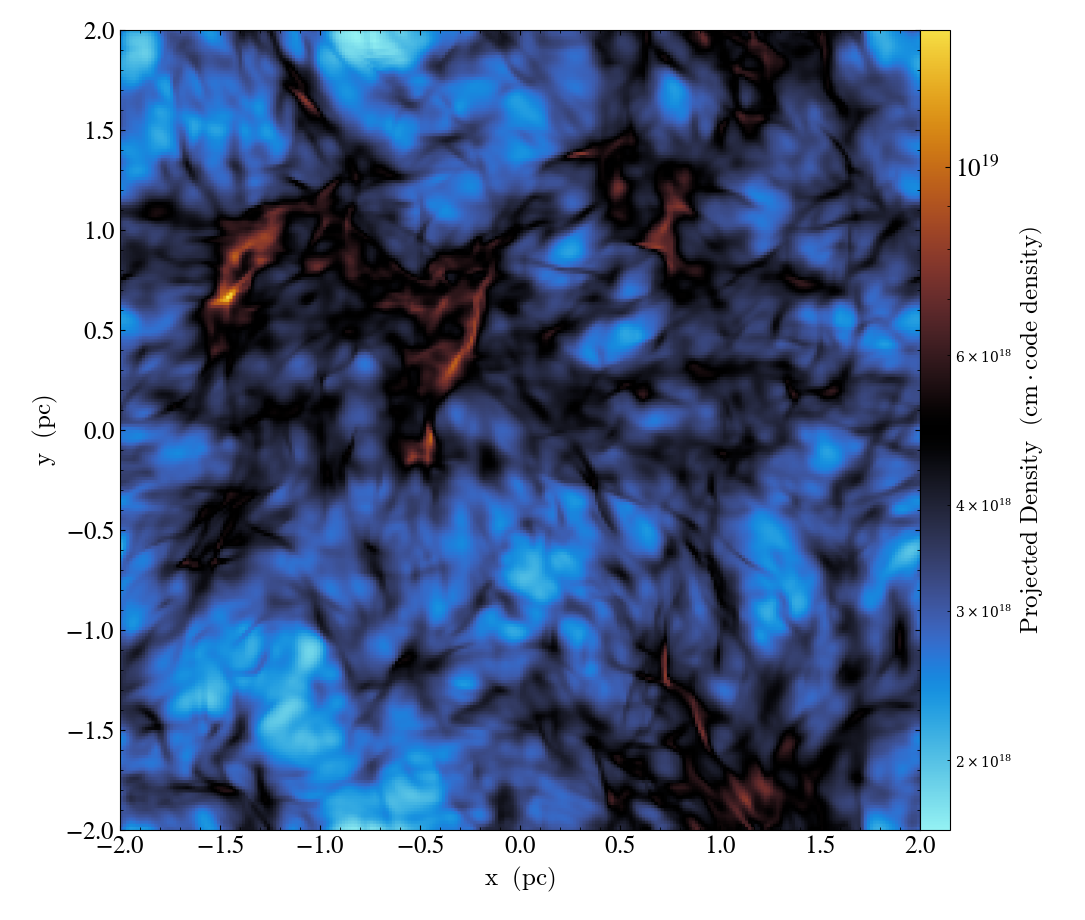

In [18]:
p = yt.ProjectionPlot(ds, "z", ("ramses", "Density"))
dens_col = 'cmr.iceburn'
pres_col = 'cmr.wildfire'
p.set_cmap(("ramses", "Density"), dens_col)
p.show()

yt : [INFO     ] 2023-08-30 14:29:33,705 Projection completed
yt : [INFO     ] 2023-08-30 14:29:33,706 xlim = 0.000000 1.000000
yt : [INFO     ] 2023-08-30 14:29:33,706 ylim = 0.000000 1.000000
yt : [INFO     ] 2023-08-30 14:29:33,706 xlim = 0.000000 1.000000
yt : [INFO     ] 2023-08-30 14:29:33,707 ylim = 0.000000 1.000000
yt : [INFO     ] 2023-08-30 14:29:33,708 Making a fixed resolution buffer of (('ramses', 'Density')) 800 by 800
yt : [INFO     ] 2023-08-30 14:29:33,772 Making a fixed resolution buffer of (('ramses', 'Pressure')) 800 by 800



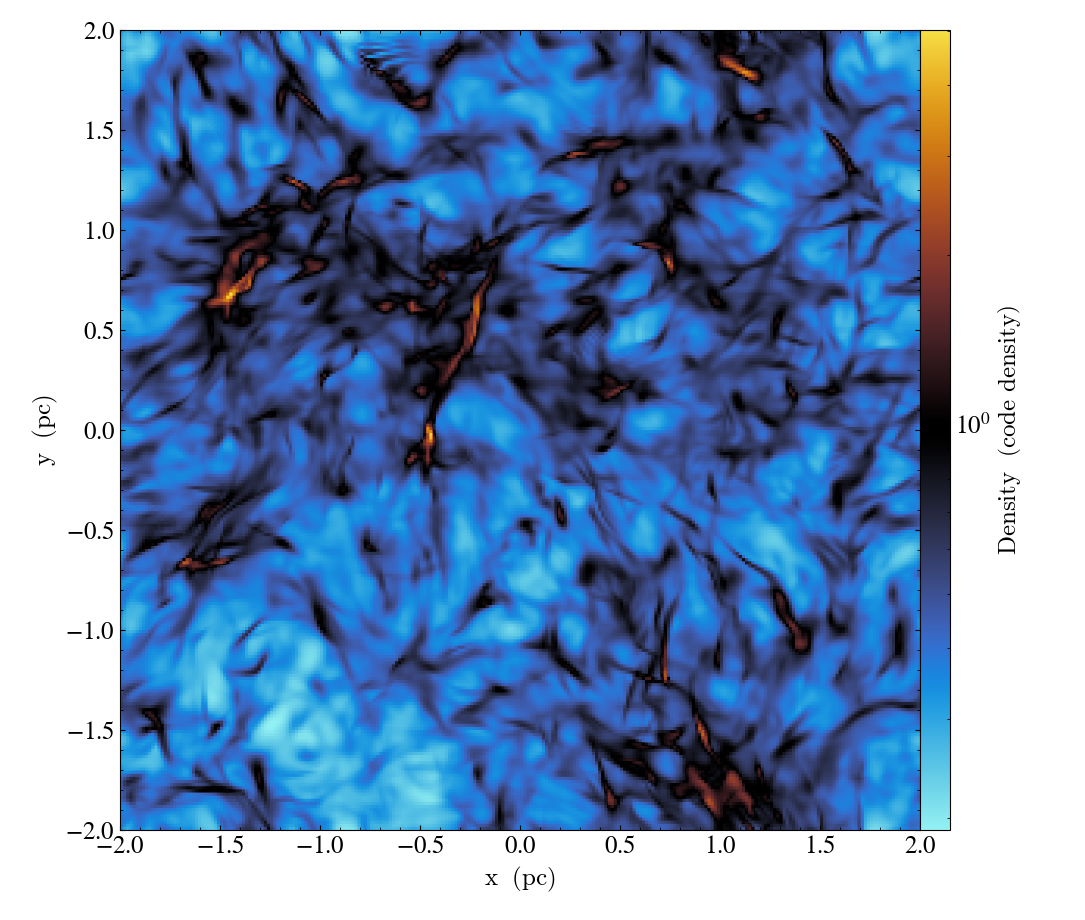
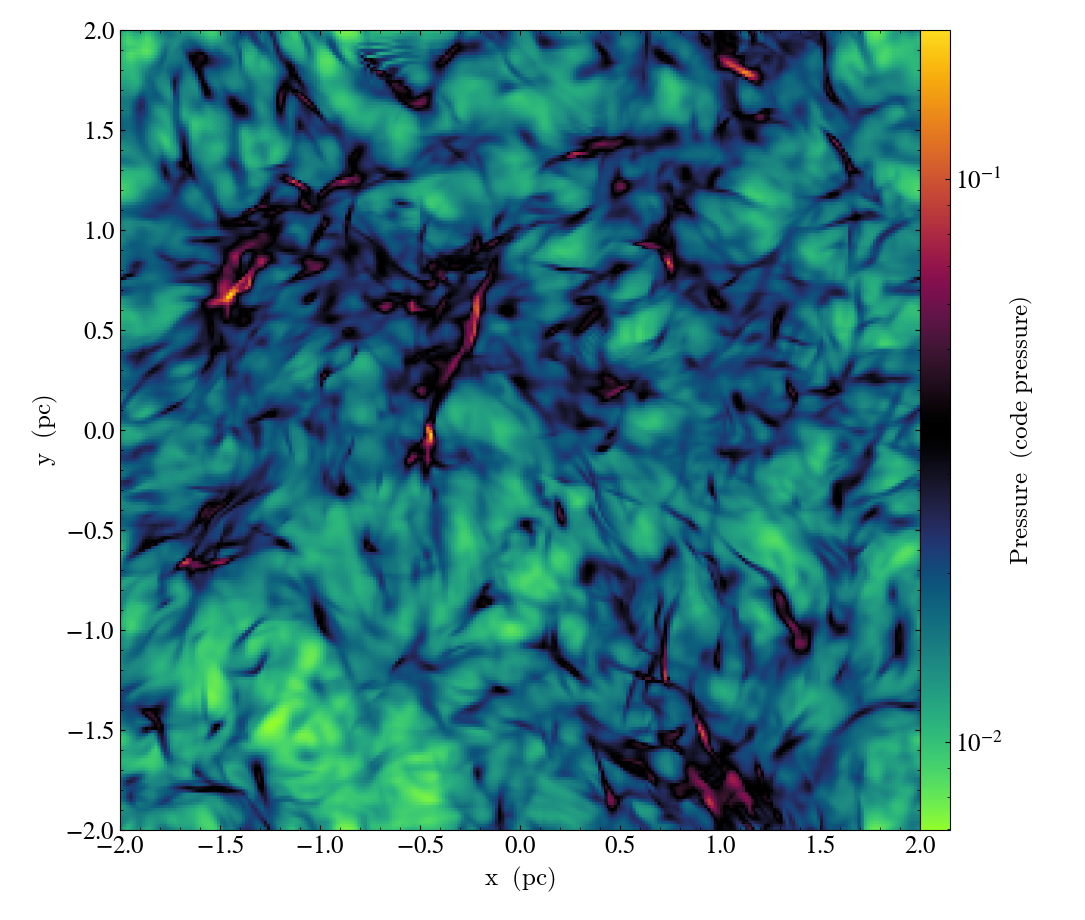

In [19]:
p = yt.ProjectionPlot(
    ds,
    "z",
    [("ramses", "Density"), ("ramses", "Pressure")],
    weight_field=("ramses", "Density"),
)
p.set_cmap(("ramses", "Density"), dens_col)
p.set_cmap(("ramses", "Pressure"), pres_col)
p.show()

yt : [INFO     ] 2023-08-30 14:29:37,904 max value is 2.70846e-19 at 0.7792968750000000 0.9472656250000000 0.4121093750000000
yt : [INFO     ] 2023-08-30 14:29:38,228 xlim = -0.087891 0.912109
yt : [INFO     ] 2023-08-30 14:29:38,229 ylim = 0.279297 1.279297
yt : [INFO     ] 2023-08-30 14:29:38,230 xlim = -0.087891 0.912109
yt : [INFO     ] 2023-08-30 14:29:38,230 ylim = 0.279297 1.279297
yt : [INFO     ] 2023-08-30 14:29:38,231 Making a fixed resolution buffer of (('ramses', 'Density')) 800 by 800
yt : [INFO     ] 2023-08-30 14:29:38,455 Making a fixed resolution buffer of (('ramses', 'Pressure')) 800 by 800
yt : [INFO     ] 2023-08-30 14:29:38,704 Making a fixed resolution buffer of (('ramses', 'Density')) 800 by 800
yt : [INFO     ] 2023-08-30 14:29:38,712 Making a fixed resolution buffer of (('ramses', 'Pressure')) 800 by 800



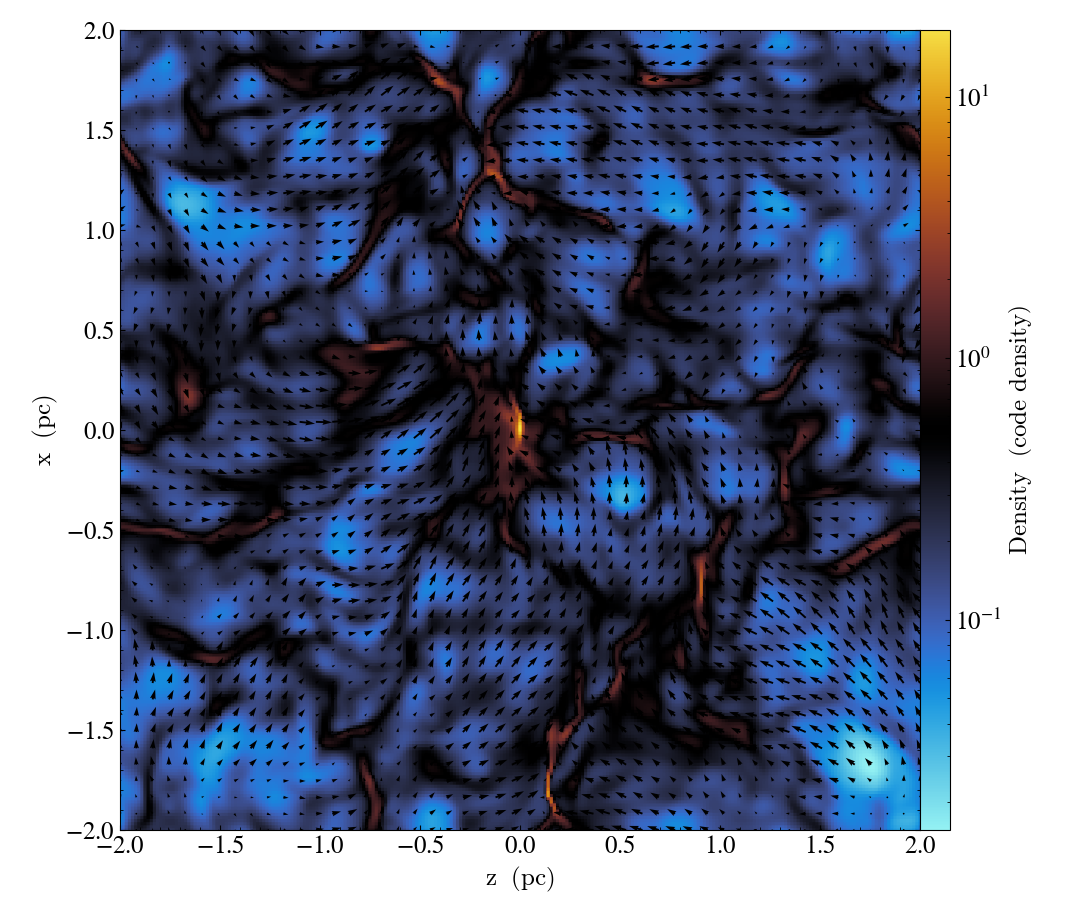
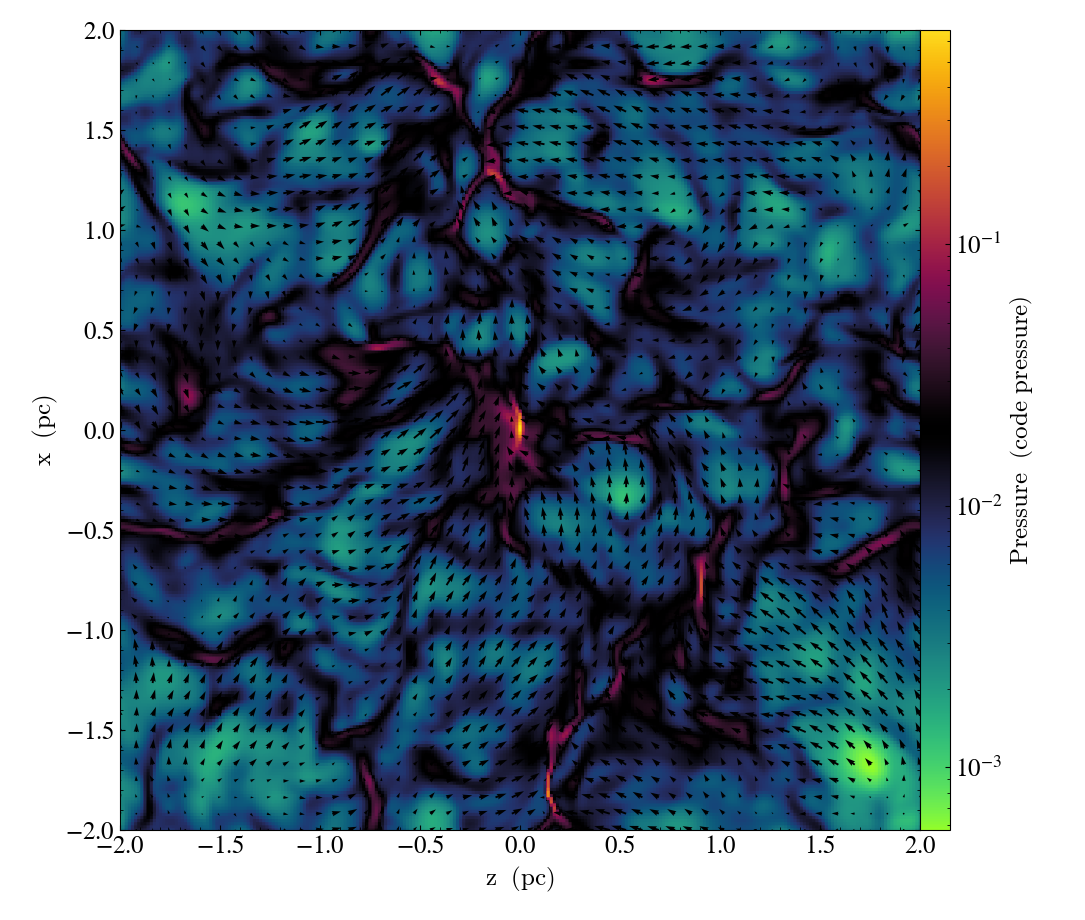

In [20]:
 s = yt.SlicePlot(
    ds, "y", [("ramses", "Density"), ("ramses", "Pressure")], center="max"
)
s.set_cmap(("ramses", "Density"), dens_col)
s.set_cmap(("ramses", "Pressure"), pres_col)
s.zoom(1)
s.annotate_velocity()


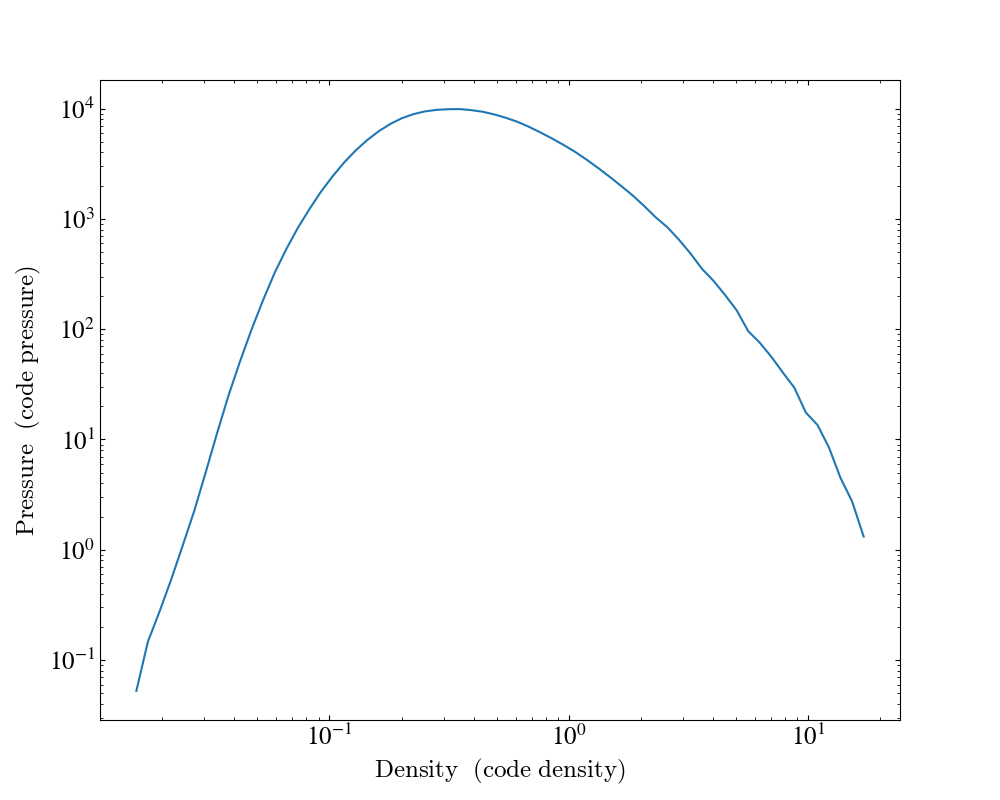

In [21]:
prof = yt.ProfilePlot(ds, ("ramses", "Density"), ("ramses", "Pressure"), weight_field=None)
prof.show()


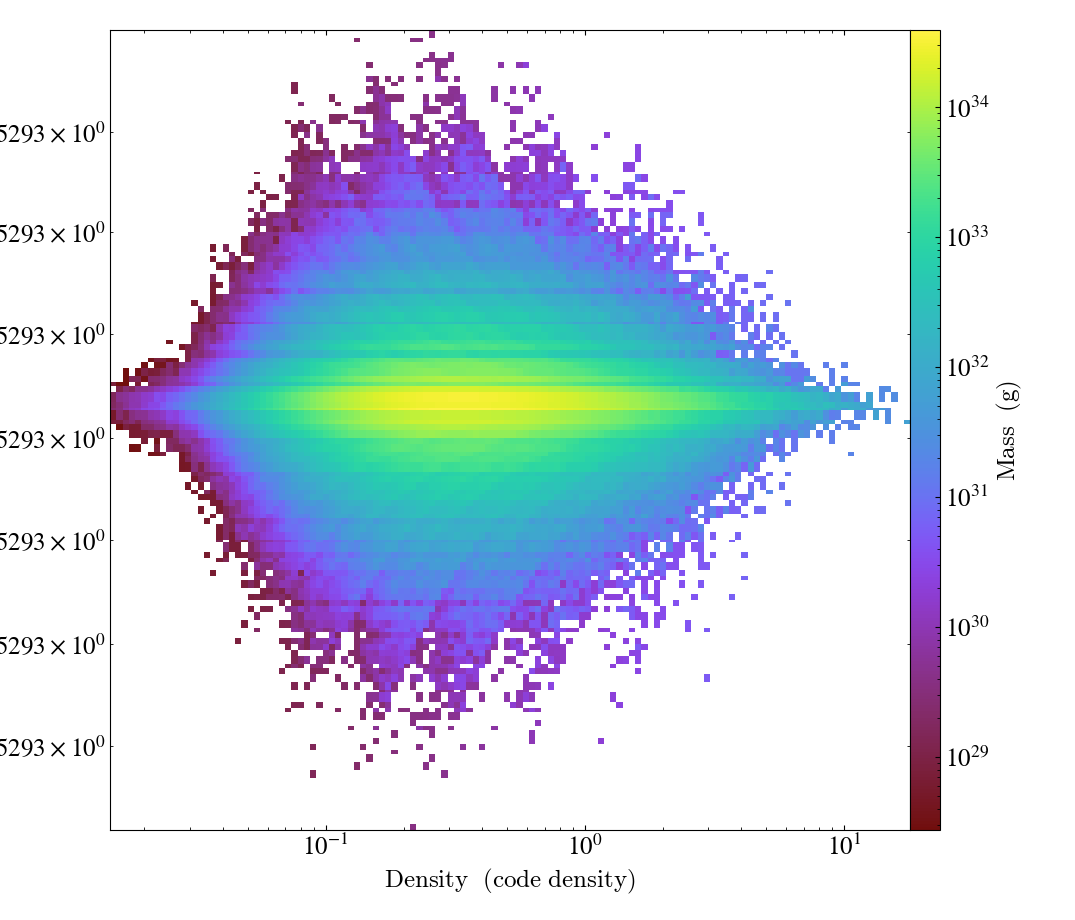

yt : [INFO     ] 2023-08-30 14:29:58,357 Saving plot info_00002_2d-Profile_Density_temperature_mass.png


['info_00002_2d-Profile_Density_temperature_mass.png']

In [22]:
my_sphere = ds.sphere("c", (5, "pc"))
plot = yt.PhasePlot(
    my_sphere, ("ramses", "Density"), ("gas", "temperature"), [("gas", "mass")], weight_field=None
)
plot.show()
plot.save()